### Numerical / Continuous  Variables

In [1]:
%%capture

%run '../lib/libraries.ipynb'

In [2]:
filterDf  = load_df('filterDf')
descDf = load_df('descDf')
types = get_var_types()

#### Variable List

In [3]:
variable_types(descDf, 'Numeric Continuous')

,category,variable
0,Assignment (a),assignment_max_attempts
1,Assignment (a),number_of_distinct_instance_items
2,Assignment (a),number_of_learners
3,Assignment Attempt (aa),assignment_attempt_number
4,Assignment Attempt (aa),final_score_unweighted
5,Assignment Attempt (aa),points_possible_unweighted
6,Assignment Attempt (aa),student_duration_mins
7,Assignment Attempt (aa),timeliness_duration_mins
8,Item Attempt (ia),item_attempt_duration_mins
9,Item Attempt (ia),raw_score


#### Statistics

In [4]:
def num_cont_vars():
  # Numerical / Continuous Variables
  desc = filterDf.select(*types['continuousVars']).summary()
  for f in types['continuousVars']:
    desc.select("summary", f).show(10,False)

num_cont_vars()

+-------+-------------------------+
|summary|assignment_attempt_number|
+-------+-------------------------+
|count  |64838                    |
|mean   |0.9758474968382739       |
|stddev |0.15352368959476007      |
|min    |0                        |
|25%    |1                        |
|50%    |1                        |
|75%    |1                        |
|max    |1                        |
+-------+-------------------------+

+-------+-----------------------+
|summary|assignment_max_attempts|
+-------+-----------------------+
|count  |64838                  |
|mean   |0.9758474968382739     |
|stddev |0.15352368959476007    |
|min    |0                      |
|25%    |1                      |
|50%    |1                      |
|75%    |1                      |
|max    |1                      |
+-------+-----------------------+

+-------+----------------------+
|summary|final_score_unweighted|
+-------+----------------------+
|count  |64838                 |
|mean   |16.00826675714858

- Binary
  - assignment_max_attempts
  - assignment_attempt_number
- Extreme Outliers
  - item_attempt_duration_mins (min and max)
  - timeliness_duration_mins (min and max)
  - student_duration_mins (max)

#### Histograms

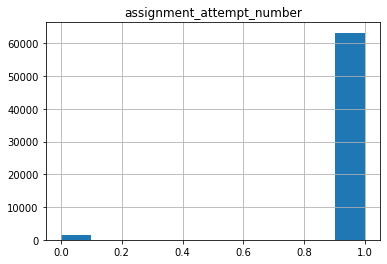

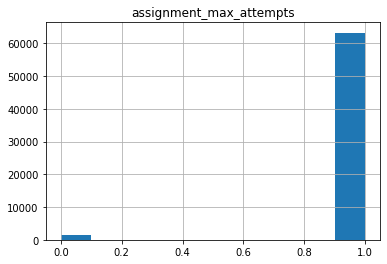

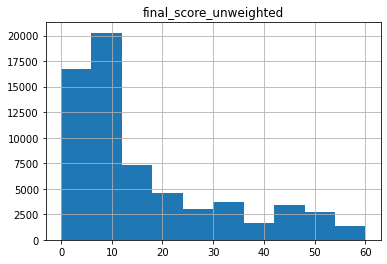

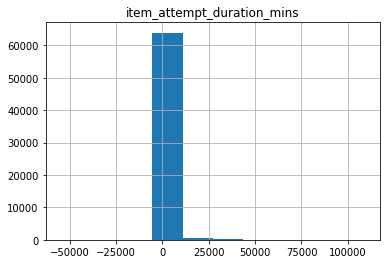

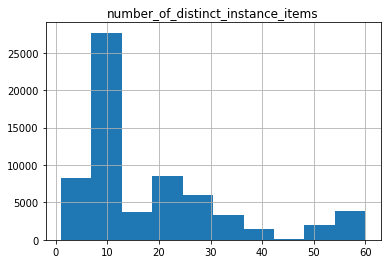

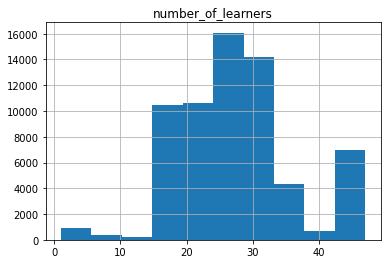

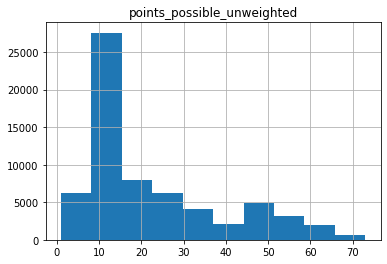

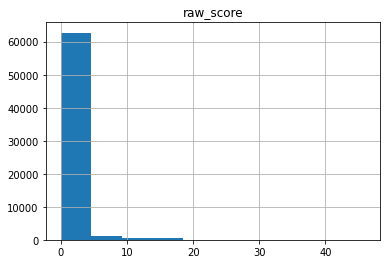

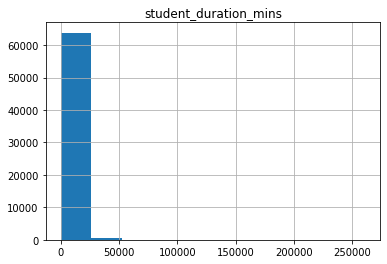

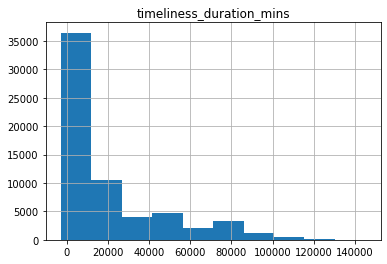

In [5]:
for f in types['continuousVars']:
  filterDf.select(f).toPandas().hist()

Normal Distribution
- number_of_learners
  - possible outliers greaterthan 40
  - investigate further

Right Skewed
- final_score_unweighted
- number_of_distinct_instance_items
- points_possible_unweighted
- raw_score
- student_duration_mins
- timeliness_duration_mins
  - investigate extreme values of over 140,000

Binary Values (0/1)
- assignment_max_attempts
- assignment_attempt_number
- Appears binary but the variable name indicates it could have any values. The data only contains 1 and 0
- Investigate further

item_attempt_duration_mins
- negative values
  - stop before start dates
  - investigate further
- extreme outliers

In [6]:
add_todo('Investigate attempt stop dates before start date')
add_todo('Investigate max durations outliers in item attempt times')
add_todo('Investigate max durations outliers in student attempt times')
add_todo('Investigate timeliness durations min and max outliers')
add_todo("Investigate number_of_learners > 40 outliers")
add_todo("Investigate binary variables assignment_attempt_number and assignment_max_attempts")

Todo: Investigate attempt stop dates before start date
Todo: Investigate max durations outliers in item attempt times
Todo: Investigate max durations outliers in student attempt times
Todo: Investigate timeliness durations min and max outliers
Todo: Investigate number_of_learners > 40 outliers
Todo: Investigate binary variables assignment_attempt_number and assignment_max_attempts


#### Correlation Heatmap

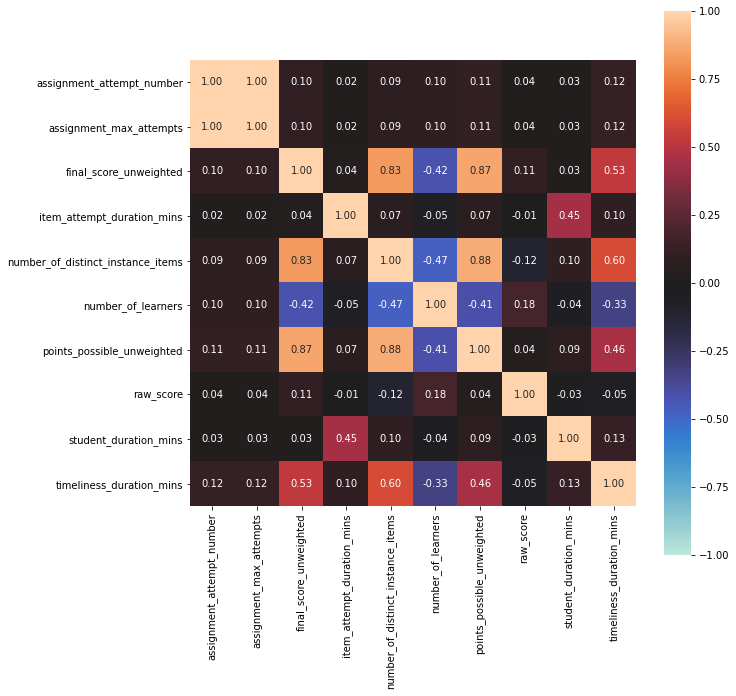

In [7]:
corr, ax = associations( filterDf.select(*types['continuousVars']).toPandas(), figsize=[10,10], nominal_columns='None' )

- Strong correlation
  - assignment_attempt_number and assignment_max_attempts
- Moderate correlation
  - points_possible_unweighted and final_score_unweighted
    - more points possible, the higher the final score
  - number_of_distinct_instance_items and final_score_unweighted
    - more items, the higher the possible score


###### Scatter plot matrix

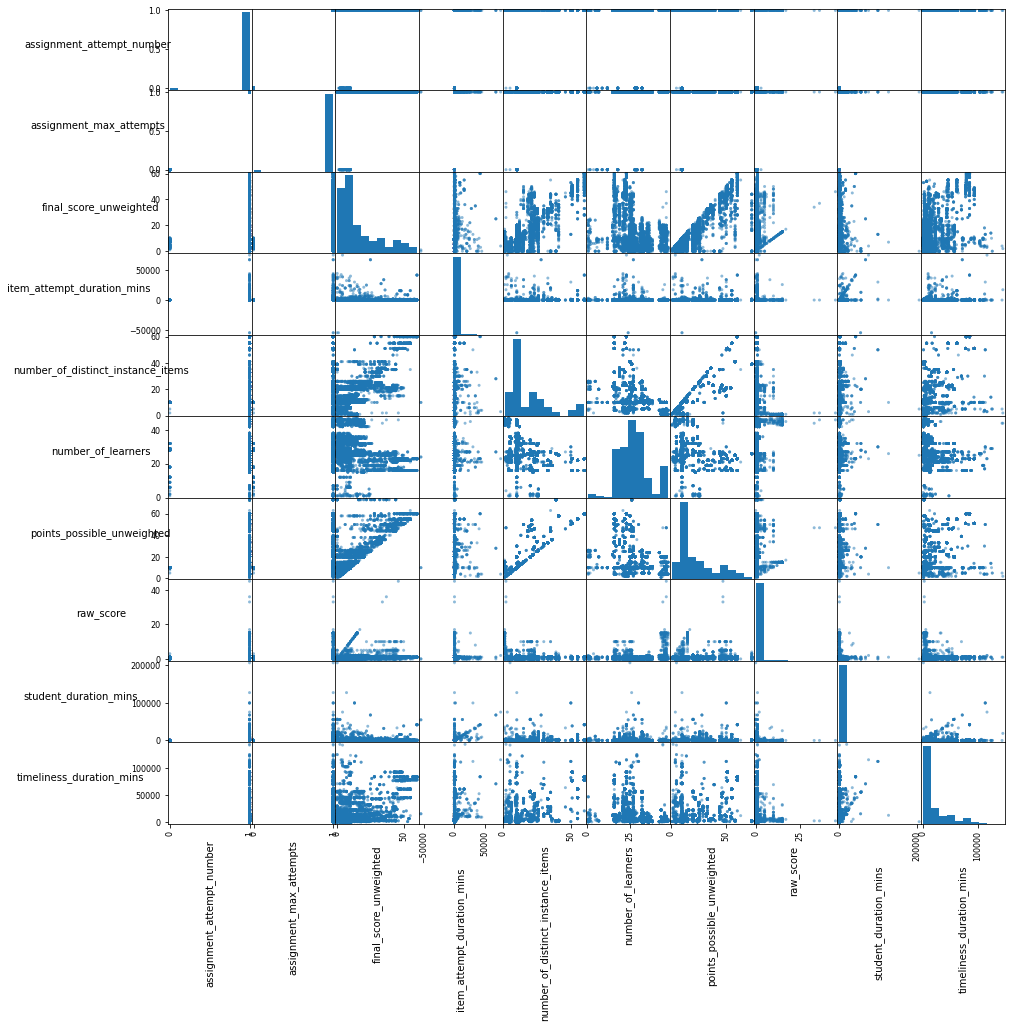

In [8]:
pdDf = get_random_sample(filterDf).select(types['continuousVars']).toPandas()

axs = pd.plotting.scatter_matrix(pdDf, figsize= [15,15])
rotate_matrix_labels(pdDf, axs)

- Many correlations due to binary and unary values
- No strong linear relations

###### Crosstab: assignment_attempt_number and assignment_max_attempts

In [9]:
dfPd = filterDf.select('assignment_attempt_number', 'assignment_max_attempts').toPandas()
pd.crosstab(dfPd.assignment_attempt_number.fillna('null'), dfPd.assignment_max_attempts.fillna('null'), margins=True, margins_name="Total")

assignment_max_attempts,0,1,Total
assignment_attempt_number,,,
0,1566,0,1566
1,0,63272,63272
Total,1566,63272,64838


- assignment_max_attempts 1 is always assignment_attempt_number = 1

###### Null and Zero Variables

In [10]:
null_zero_counts(filterDf, types['continuousVars'])

,null,zero
assignment_attempt_number,0,1566
assignment_max_attempts,0,1566
final_score_unweighted,0,2867
item_attempt_duration_mins,0,36
number_of_distinct_instance_items,0,0
number_of_learners,0,0
points_possible_unweighted,0,0
raw_score,34,18691
student_duration_mins,437,33
timeliness_duration_mins,2003,0


- possibile correlation between assignment_attempt_number and assignment_max_attempts
  - both have 1566 zero values
  - Needs further investigation
- final_score_unweighted has 2867 zero values
  - reasonable amount of low scores
- raw_score
  - 34 null values
  - 18691 zero values
    - investigate further

In [11]:
add_todo('Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values')
add_todo('Investigate final_score_unweighted zero values')
add_todo('Investigate null values in raw_score')
add_todo('Investigate zero values in raw_score')

Todo: Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values
Todo: Investigate final_score_unweighted zero values
Todo: Investigate null values in raw_score
Todo: Investigate zero values in raw_score
